## 공공 인공지능 Open API 활용

In [1]:
import urllib3, json, base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

- 여러가지 객체 검출

In [2]:
with open('etriaikey.txt') as f:
  ai_key = f.read()

In [7]:
img_file = '사진/공원.jpg'
img_type = img_file.split('.')[-1]
img_type

'jpg'

In [4]:
# JFIF 타입은 JPG로 변경
img_type = 'jpg' if img_type == 'jfif' else img_type

In [8]:
with open(img_file, "rb") as file:
  img_contents = base64.b64encode(file.read()).decode("utf8")

In [9]:
request_json = {
    "access_key": ai_key,
    "argument": {
        "type": img_type,
        "file": img_contents
    }
}

In [10]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
)

In [18]:
# 위와 같은 코드
"""
import requests
response = requests.post(
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    data=json.dumps(request_json))
"""

'\nimport requests\nresponse = requests.post(\n    openApiURL,\n    headers={"Content-Type": "application/json; charset=UTF-8"},\n    data=json.dumps(request_json))\n'

In [11]:
response.status

200

In [13]:
result = json.loads(response.data)
obj_list = result['return_object']['data']

- 시각화

In [14]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

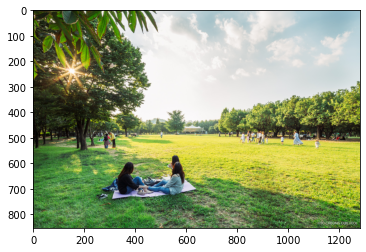

In [15]:
img = Image.open(img_file)
plt.imshow(img);

In [25]:
img = Image.open(img_file)
draw = ImageDraw.Draw(img)
for obj in obj_list:
 name = obj['class']
 x = int(obj['x'])
 y = int(obj['y'])
 w = int(obj['width'])
 h = int(obj['height'])
 draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=2)
 draw.text((x+10,y-20), name, font=ImageFont.truetype('malgun.ttf',20), fill=(0,0,255))

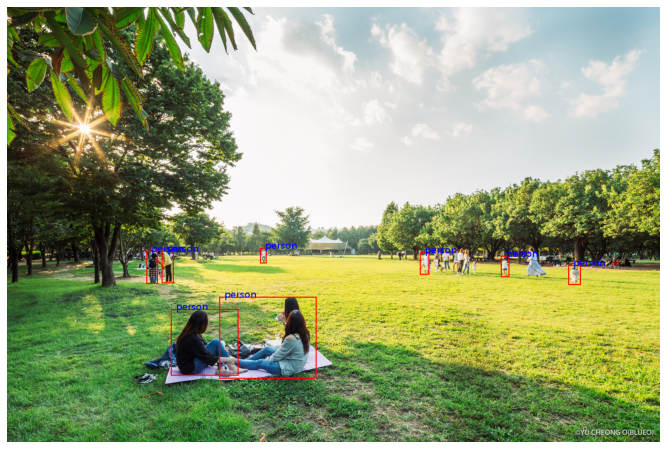

In [26]:
plt.figure(figsize=(12,8))
plt.imshow(img); plt.axis('off'); plt.show()

- 여러개의 그림에서 객체 검출하기

In [36]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


In [37]:
from glob import glob
img_glob = glob('사진/*.jpg')

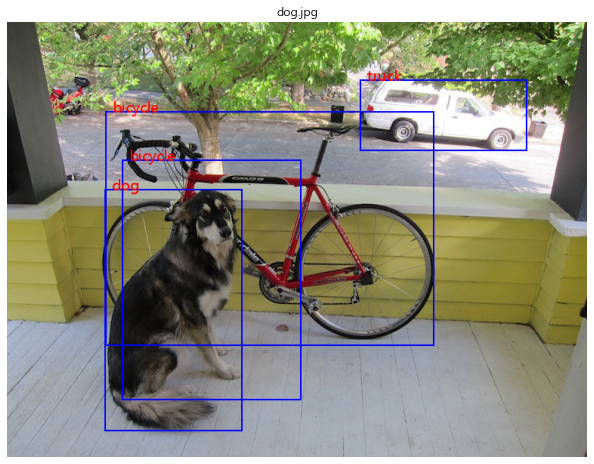

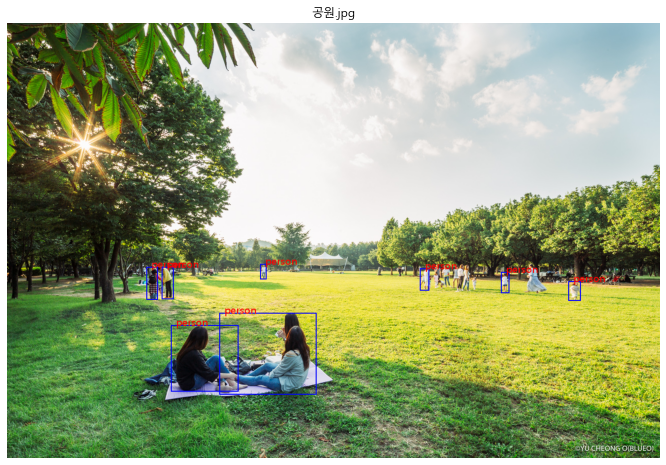

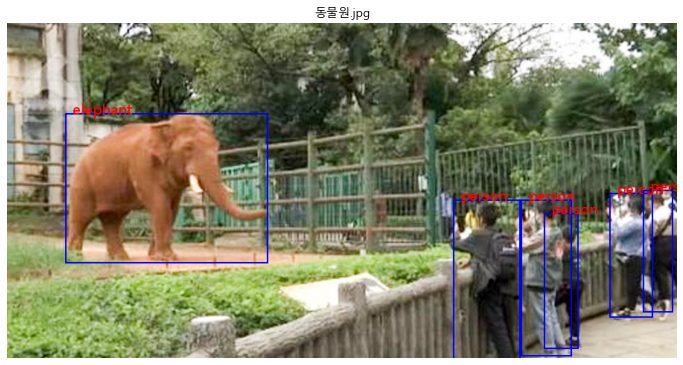

In [38]:
#http = urllib3.PoolManager() # 프로그램 안에서 한번만 실행하면 됨
for img_file in img_glob:
  img_type = img_file.split('.')[-1]
  img_type = 'jpg' if img_type == 'jfif' else img_type
  with open(img_file, "rb") as file:
   img_contents = base64.b64encode(file.read()).decode("utf8")

  request_json = {
    "access_key": ai_key,
    "argument": {
        "type": img_type,
        "file": img_contents
    }
  }

  response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(request_json)
  )
  if response.status != 200:
    continue

  result = json.loads(response.data)
  obj_list = result['return_object']['data']
  img = Image.open(img_file)
  draw = ImageDraw.Draw(img)

  for obj in obj_list:
    name = obj['class']
    x = int(obj['x'])
    y = int(obj['y'])
    w = int(obj['width'])
    h = int(obj['height'])
    draw.rectangle(((x,y), (x+w,y+h)), outline=(0,0,255), width=2)
    draw.text((x+10,y-20), name, font=ImageFont.truetype('malgun.ttf',20), fill=(255,0,0))
  
  plt.figure(figsize=(12,8))
  plt.imshow(img); plt.axis('off'); plt.title(img_file.split('\\')[-1]), plt.show()